<a href="https://colab.research.google.com/github/past6301/PROJECT3/blob/main/BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Datasets/Iris.csv")

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
X=data.drop(['Id', 'Species'], axis=1)
X.head()

In [ ]:
Y=data['Species']

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
X.isnull().sum()

In [ ]:
c=pd.plotting.scatter_matrix(data,alpha=0.2,figsize=(17,17),diagonal='hist')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=data.corr()
print(corr)
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,vmin=-1.0,vmax=1.0)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
Y=lb.fit_transform(Y)
print(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

In [ ]:
from keras.backend import dropout
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
input_shape=X_train.shape[1]
model=Sequential()
#model.add(Dense(2048, activation='relu', input_dim=4))
model.add(Dense(1024, activation='relu', input_dim=4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

#optimizers
#model.compile(optimizer='Adam',loss='mse', metrics=['accuracy'])
#model.compile(optimizer='Adadelta',loss='mse', metrics=['accuracy'])
#model.compile(optimizer='SGD',loss='mse', metrics=['accuracy'])
model.compile(optimizer='RMSProp',loss='mse', metrics=['accuracy'])
#model.compile(optimizer='ADAMax',loss='mse', metrics=['accuracy'])

history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),batch_size=64,epochs=150,verbose=1)

In [ ]:
loss,accuracy=model.evaluate(X_test,Y_test)
print("accuracy",(accuracy*100),"%")
print("loss",loss)

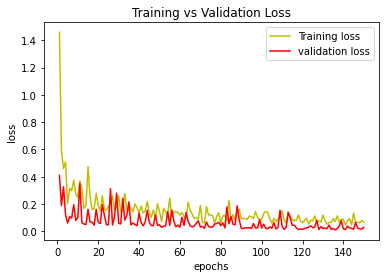

In [ ]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,1+len(loss))
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

**Show predicted value vs test value**

In [ ]:
import numpy as np
from numpy import argmax
pred=model.predict(X_test)
pred=np.argmax(pred,axis=1)
print(pred[2])
print(Y_test[2])

0
0
